In [81]:
import pandas as pd
import plotly.express as px
import glob

In [82]:
!ls 10xv3_final_summaries/

10x_genomics_data-heart_1k_v3-final_summary.csv
10x_genomics_data-neuron_1k_v3-final_summary.csv
10x_genomics_data-pbmc_1k_v3-final_summary.csv
broad_10xv3-SRR9169192-final_summary.csv
broad_10xv3-SRR9169193-final_summary.csv
broad_10xv3-SRR9169194-final_summary.csv
broad_10xv3-SRR9169414-final_summary.csv
broad_10xv3-SRR9170683-final_summary.csv
broad_10xv3-SRR9170684-final_summary.csv


In [83]:
for item in glob.glob('./10xv3_final_summaries/*'):
    print(item.split('/')[2].split('-final_summary.csv')[0])

10x_genomics_data-heart_1k_v3
10x_genomics_data-neuron_1k_v3
10x_genomics_data-pbmc_1k_v3
broad_10xv3-SRR9169192
broad_10xv3-SRR9169193
broad_10xv3-SRR9169194
broad_10xv3-SRR9169414
broad_10xv3-SRR9170683
broad_10xv3-SRR9170684


In [96]:
dfs={}
for item in glob.glob('./10xv3_final_summaries/*'):
    dfs[item.split('/')[2].split('-final_summary.csv')[0]] = pd.read_csv(item).sort_values(["sampled_cells", "total_UMIs"], ascending = (True, True))

In [86]:
for x in dfs:
    print(x)

10x_genomics_data-heart_1k_v3
10x_genomics_data-neuron_1k_v3
10x_genomics_data-pbmc_1k_v3
broad_10xv3-SRR9169192
broad_10xv3-SRR9169193
broad_10xv3-SRR9169194
broad_10xv3-SRR9169414
broad_10xv3-SRR9170683
broad_10xv3-SRR9170684


In [87]:
df=pd.concat([dfs[x] for x in dfs])

In [88]:
df

total_seqtk_reads  sampled_cells  validation_error  total_UMIs  \
0               5000000            500            1165.5     1940326   
1               5000000            500            1214.2     1940326   
2               5000000            500            1197.1     1940326   
3               5000000            500            1007.2     1940326   
4               5000000            500            1407.0     1940326   
...                 ...            ...               ...         ...   
1604           60998228           2822             231.3     3826402   
1605           60998228           2822             245.6     3826402   
1606           60998228           2822             223.2     3826402   
1607           60998228           2822             229.9     3826402   
1618           60998228           2822             229.2     3826402   

      estimated_reads  estimated_UMIs  reads_per_cell  UMIs_per_cell  \
0             2582644         1002234            5165           2004   
1             2582644         1002234            5165           2004   
2             2582644         1002234            5165           2004   
3             2582644         1002234            5165           2004   
4             2582644         1002234            5165           2004   
...               ...             ...             ...            ...   
1604         43283127         2715138           15337            962   
1605         43283127         2715138           15337            962   
1606         43283127         2715138           15337            962   
1607         43283127         2715138           15337            962   
1618         43283127         2715138           15337            962   

      duplication_rate      dataset  
0                 2.58  heart_1k_v3  
1                 2.58  heart_1k_v3  
2                 2.58  heart_1k_v3  
3                 2.58  heart_1k_v3  
4                 2.58  heart_1k_v3  
...                ...          ...  
1604             15.94   SRR9170684  
1605             15.94   SRR9170684  
1606             15.94   SRR9170684  
1607             15.94   SRR9170684  
1618             15.94   SRR9170684  

[14010 rows x 10 columns]

# plot error vs UMIs per cell grouped by number of sampled cells

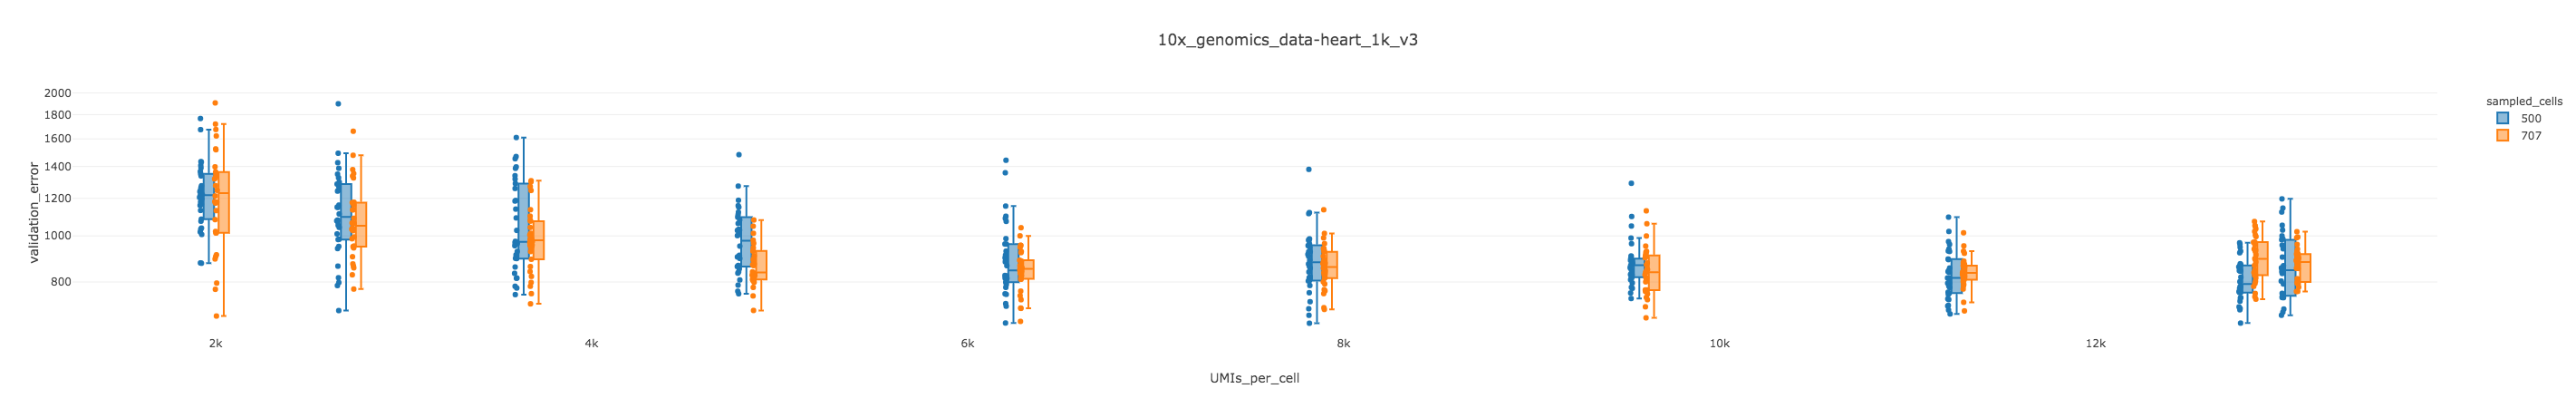

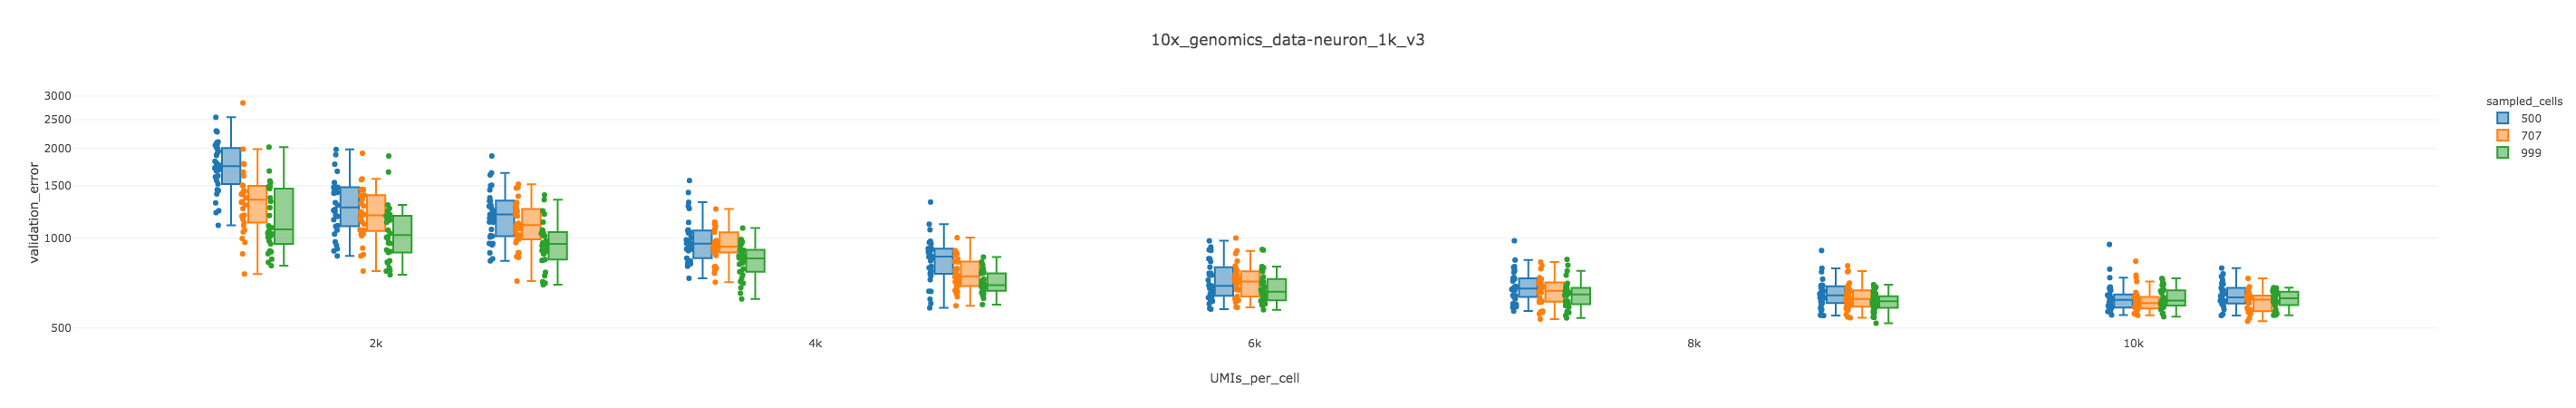

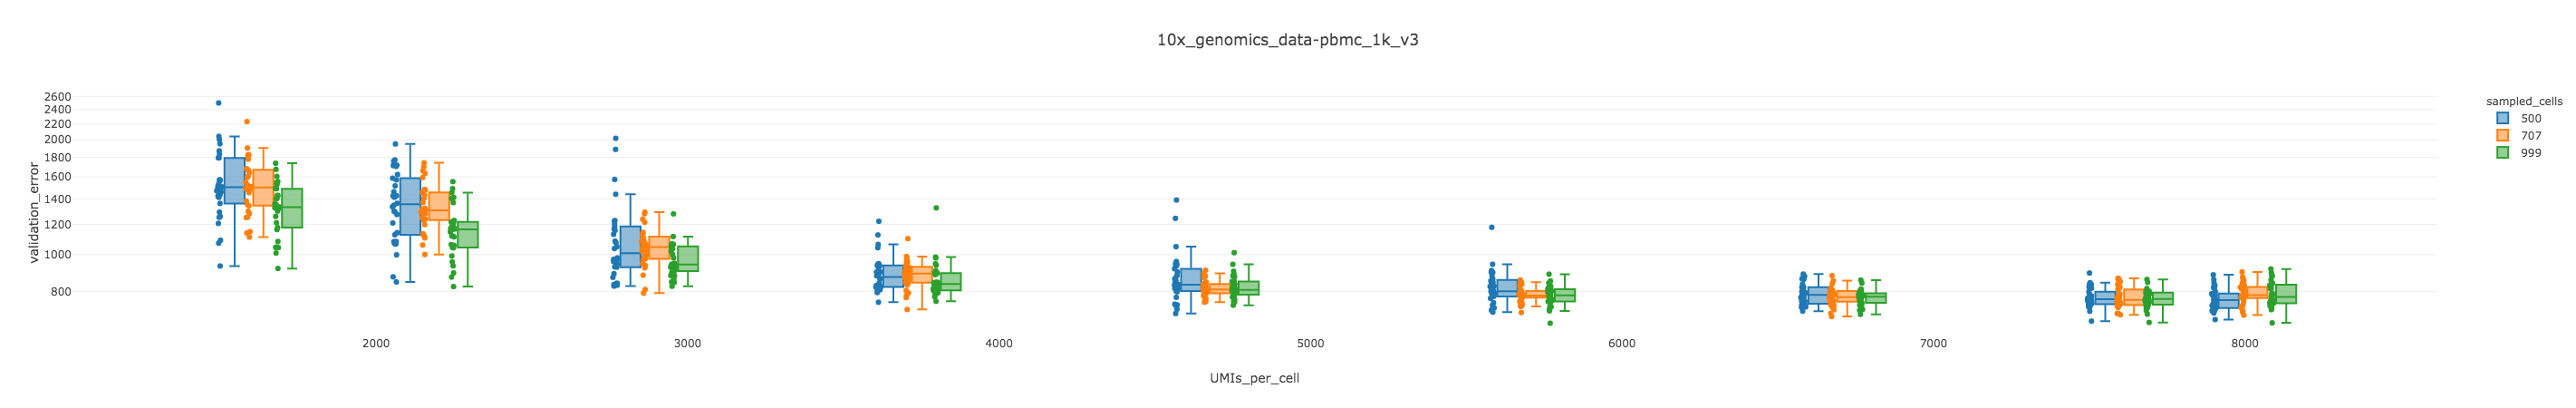

In [98]:
for ds in dfs:
    fig = px.box(dfs[ds], x="UMIs_per_cell", y="validation_error", color="sampled_cells", hover_name="total_seqtk_reads", title = ds,log_y=True,template="none",log_x=False, points="all")
    fig.show()

# plot error vs sampled cells grouped by number of UMIs per cell

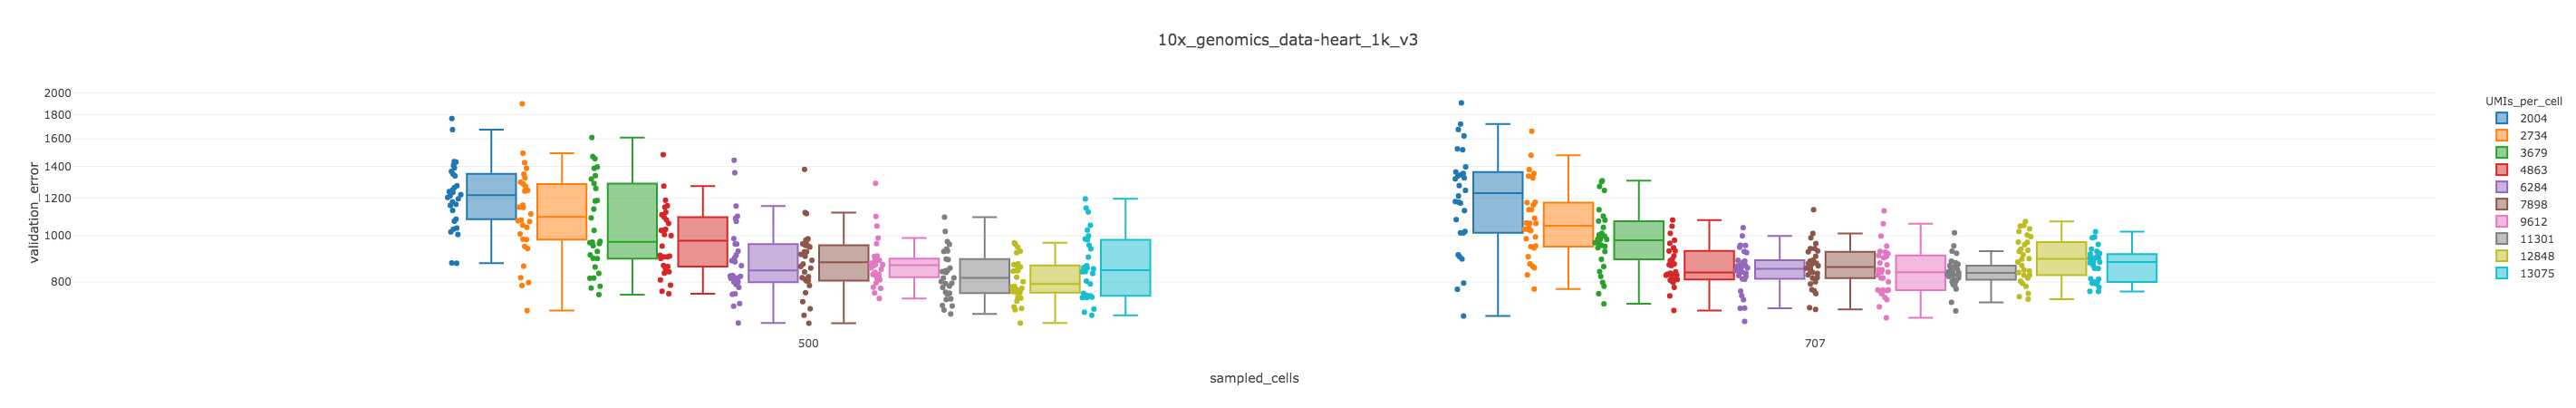

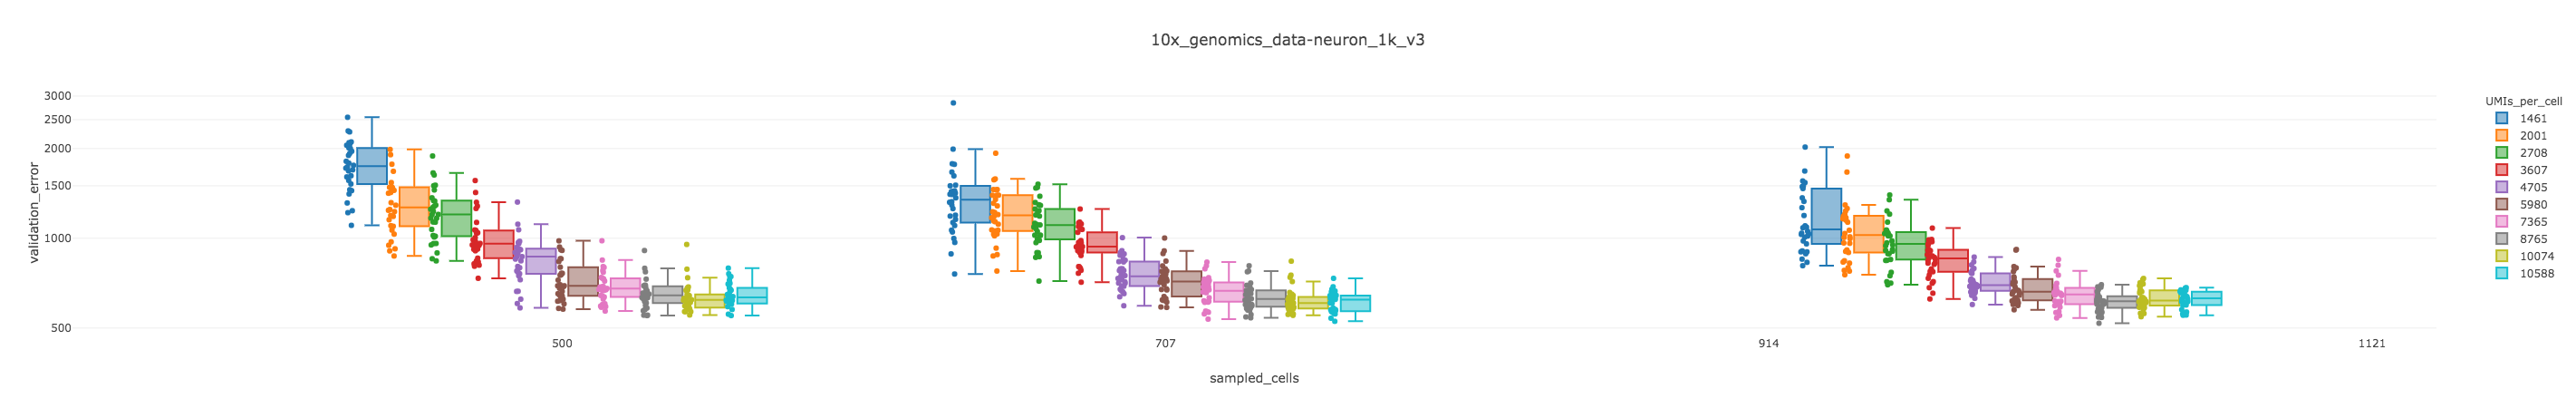

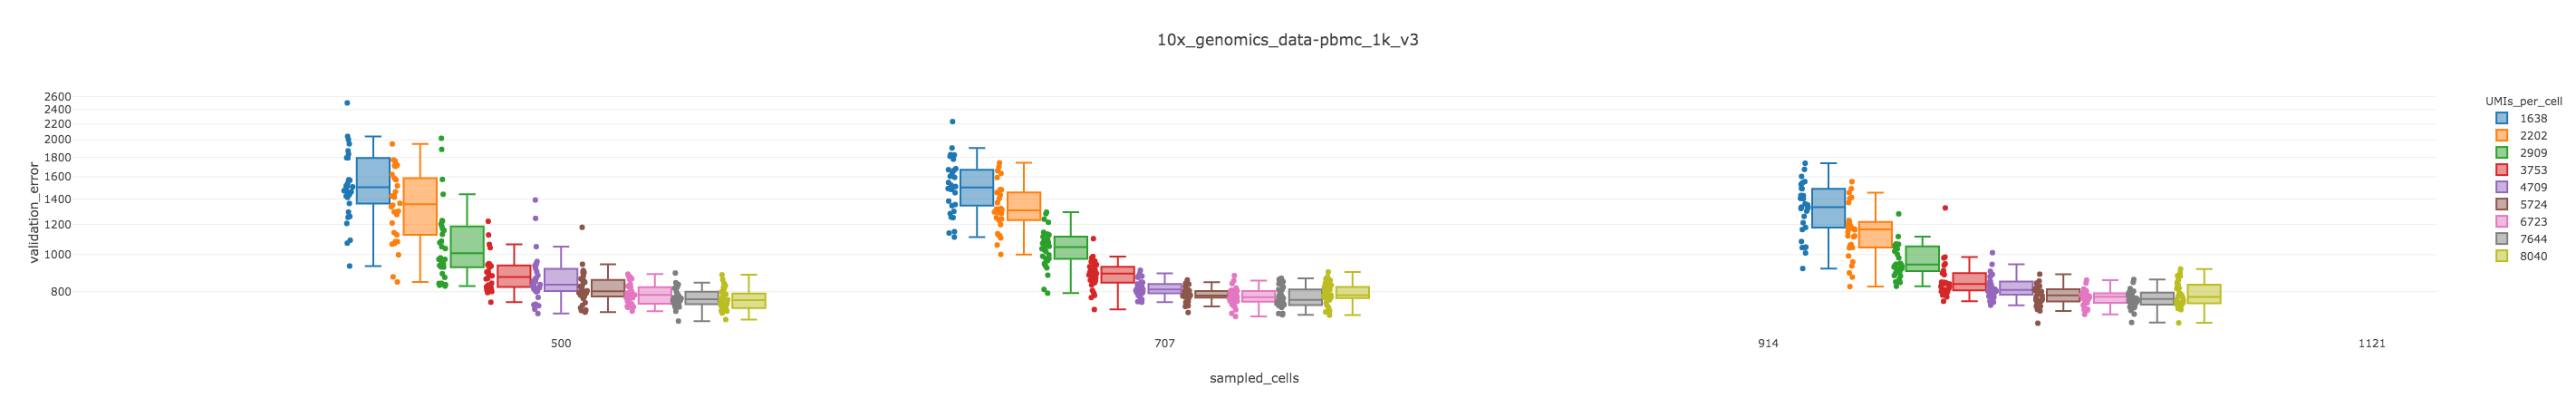

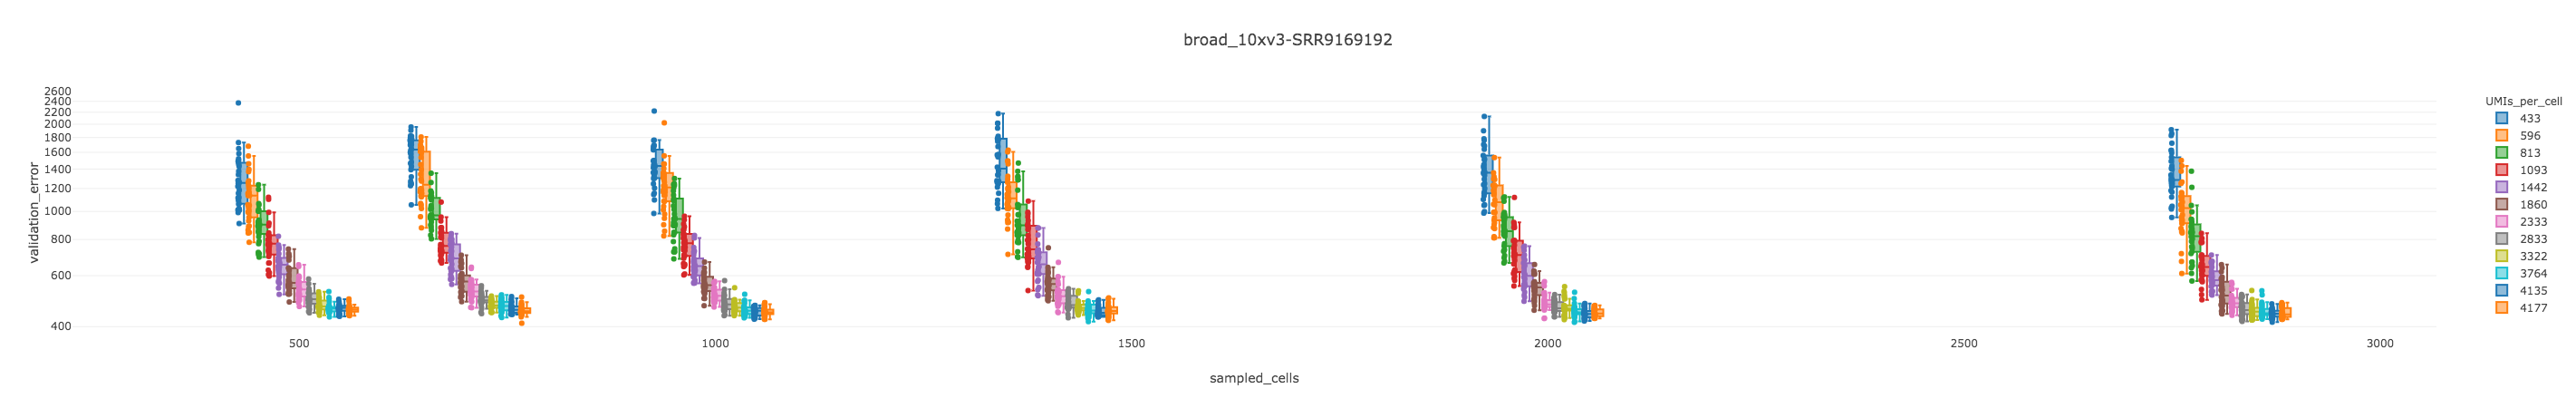

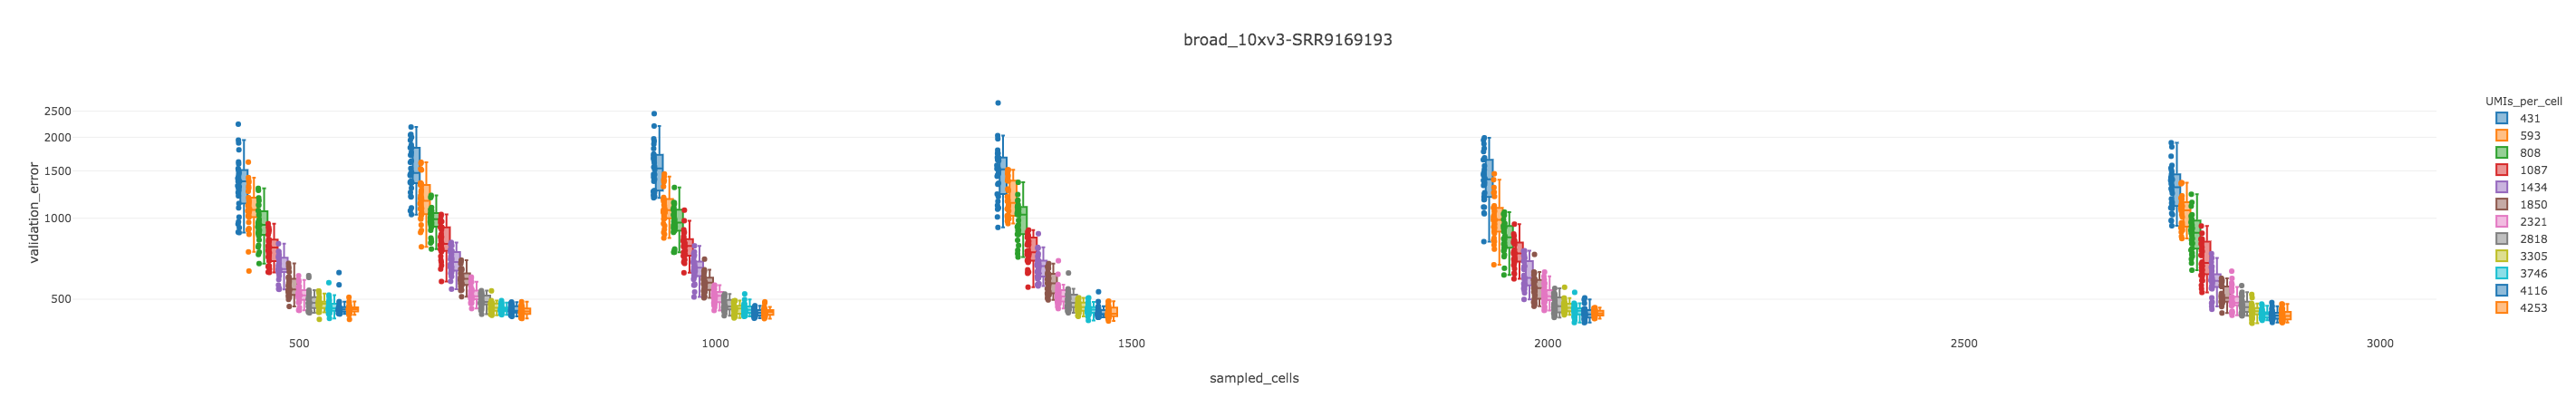

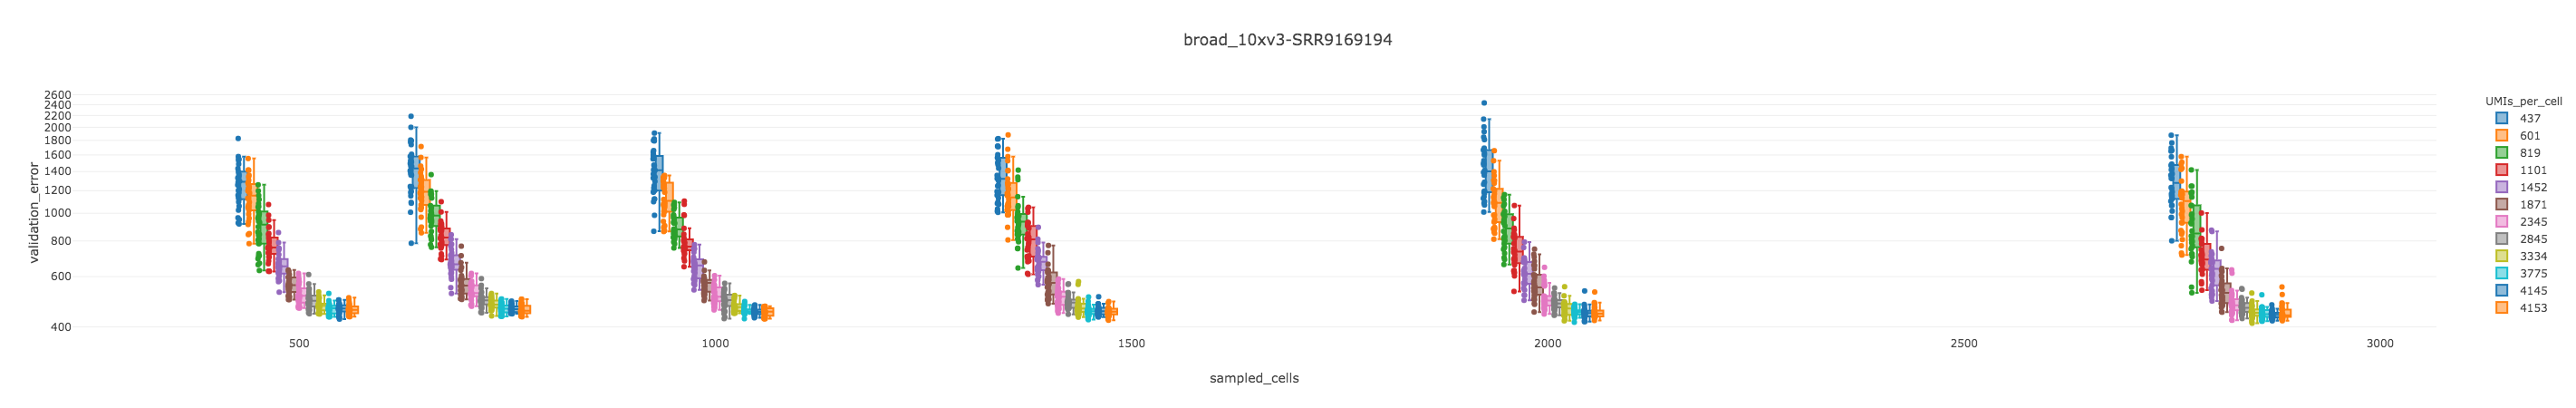

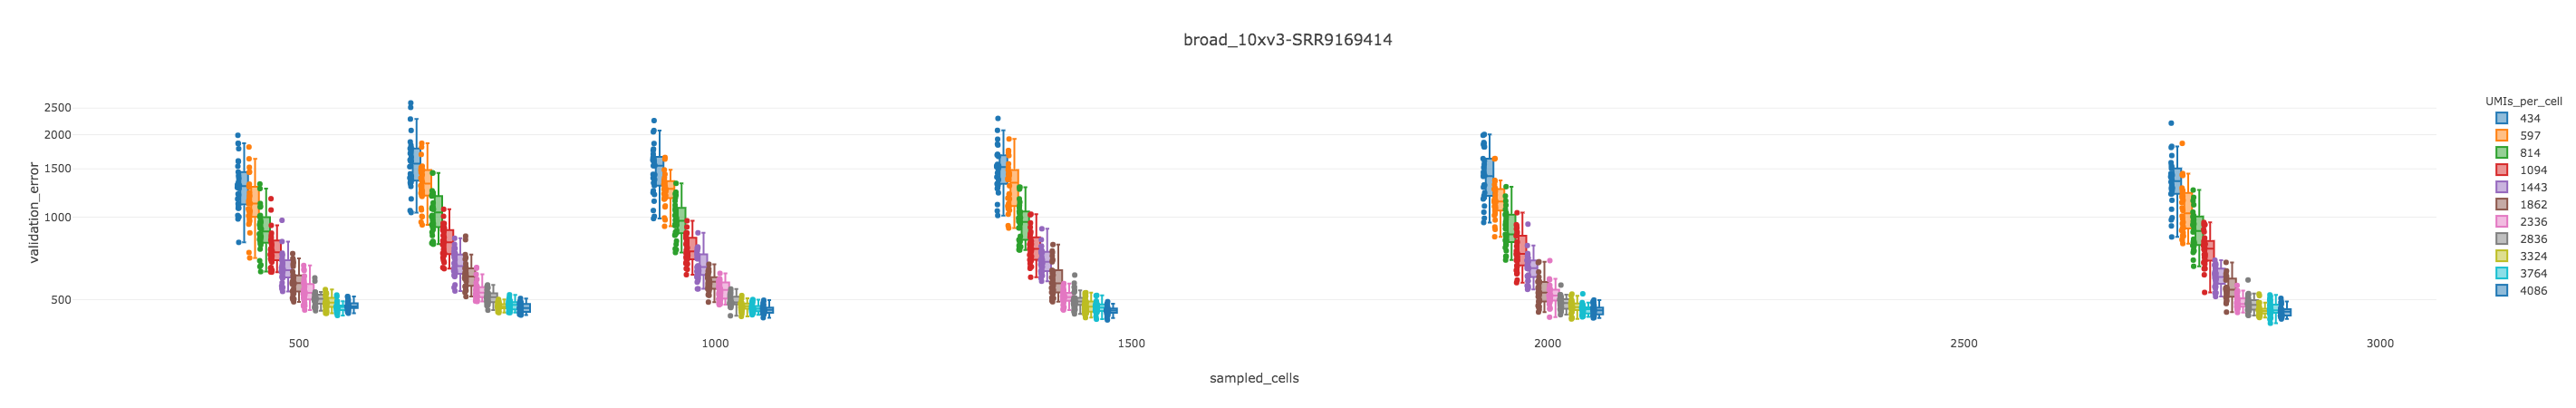

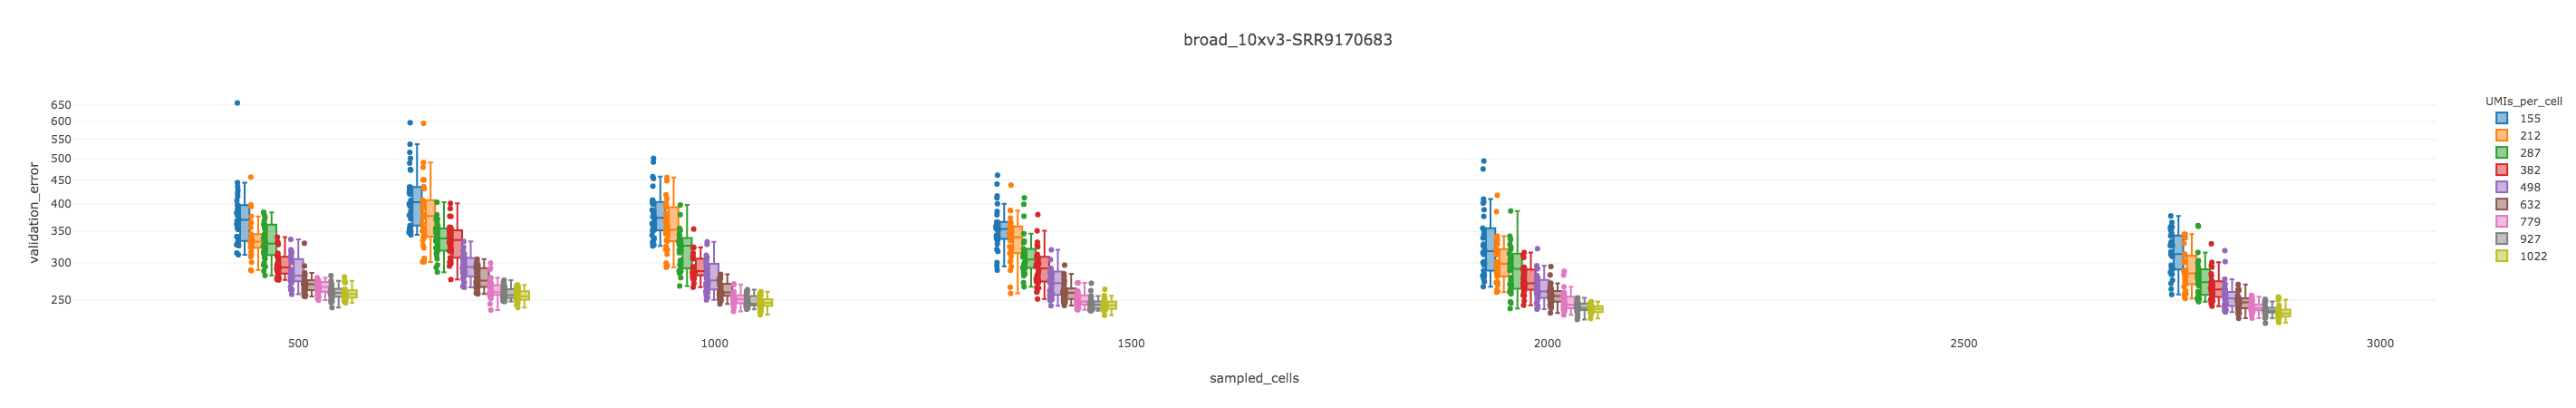

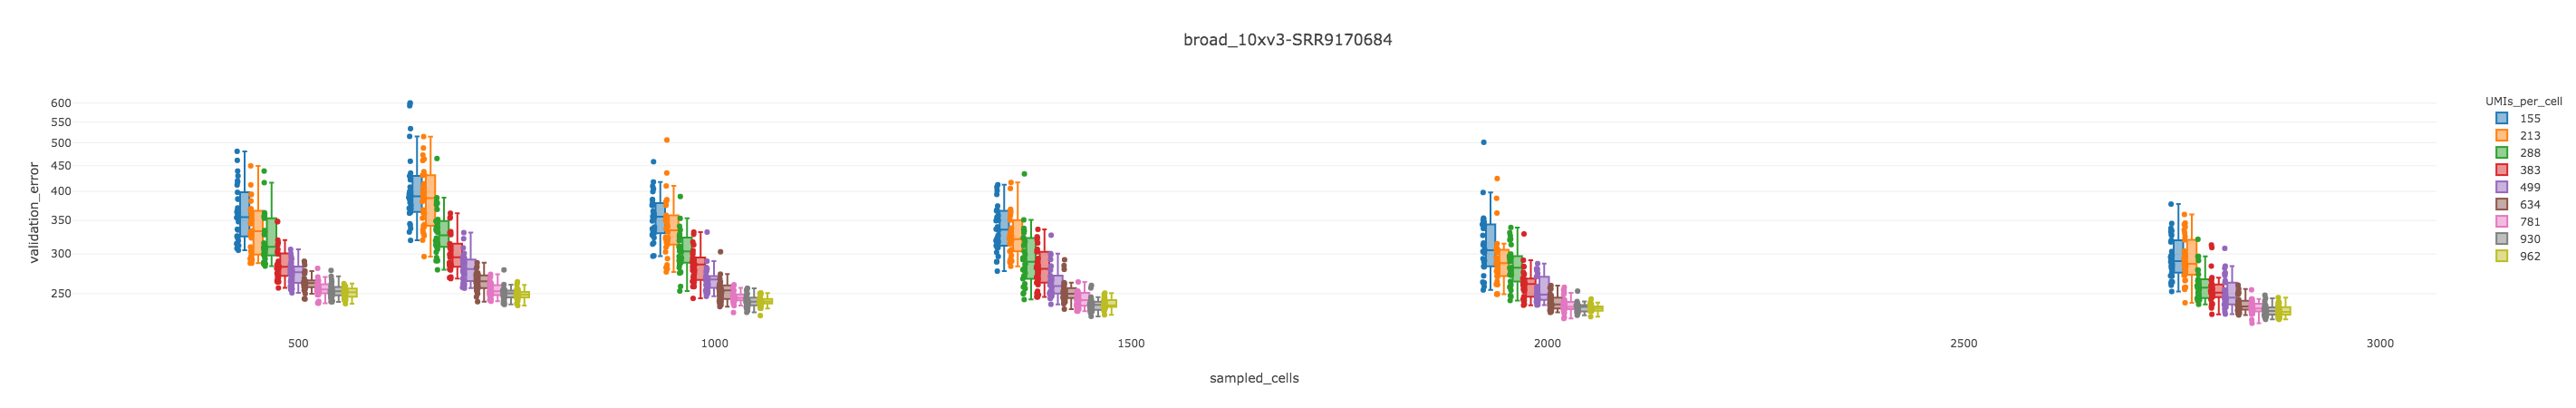

In [97]:
for ds in dfs:
    fig = px.box(dfs[ds], x="sampled_cells", y="validation_error", color="UMIs_per_cell", hover_name="total_seqtk_reads", title = ds,log_y=True,template="none",log_x=False, points="all")
    fig.show()